In [ ]:
#Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
#Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
#How does Infant and Adult mortality rates affect life expectancy?
#Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
#What is the impact of schooling on the lifespan of humans?
#Does Life Expectancy have positive or negative relationship with drinking alcohol?
#Do densely populated countries tend to have lower life expectancy?
#What is the impact of Immunization coverage on life Expectancy?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Upload the CSV file
df = pd.read_csv("WHO.csv")


print(df.head())  



       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [2]:
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [3]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# 1. Delete null values
df_cleaned = df.dropna()

# 2. Convert ‘Country’ and ‘Status’ column to binary variables (One-Hot Encoding)

df_encoded = pd.get_dummies(df_cleaned, columns=['Status', 'Country'], dtype=int)

# 3. Final result
df_final = df_encoded
print(df_final.head())


   Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015              65.0            263.0             62     0.01   
1  2014              59.9            271.0             64     0.01   
2  2013              59.9            268.0             66     0.01   
3  2012              59.5            272.0             69     0.01   
4  2011              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   ...  Country_Tunisia  Country_Turkey  Country_Turkmenistan  Country_Uganda  \
0  ...                0

In [6]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Columns: 155 entries, Year to Country_Zimbabwe
dtypes: float64(16), int64(139)
memory usage: 2.0 MB
None


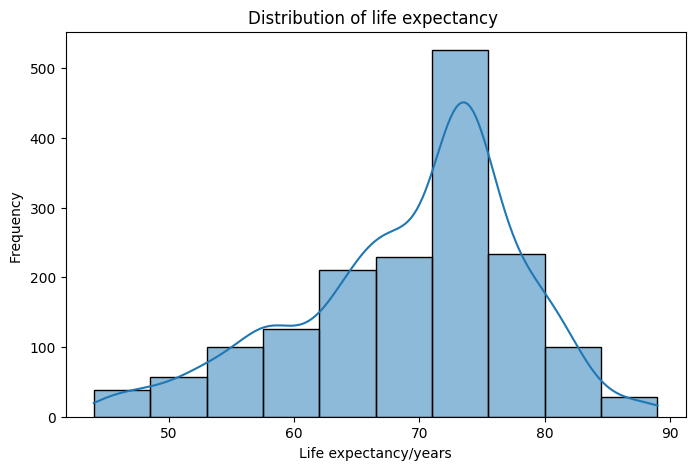

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df_final["Life expectancy "], bins=10, kde=True)  
plt.xlabel("Life expectancy/years")
plt.ylabel("Frequency ")
plt.title("Distribution of life expectancy ")
plt.show()


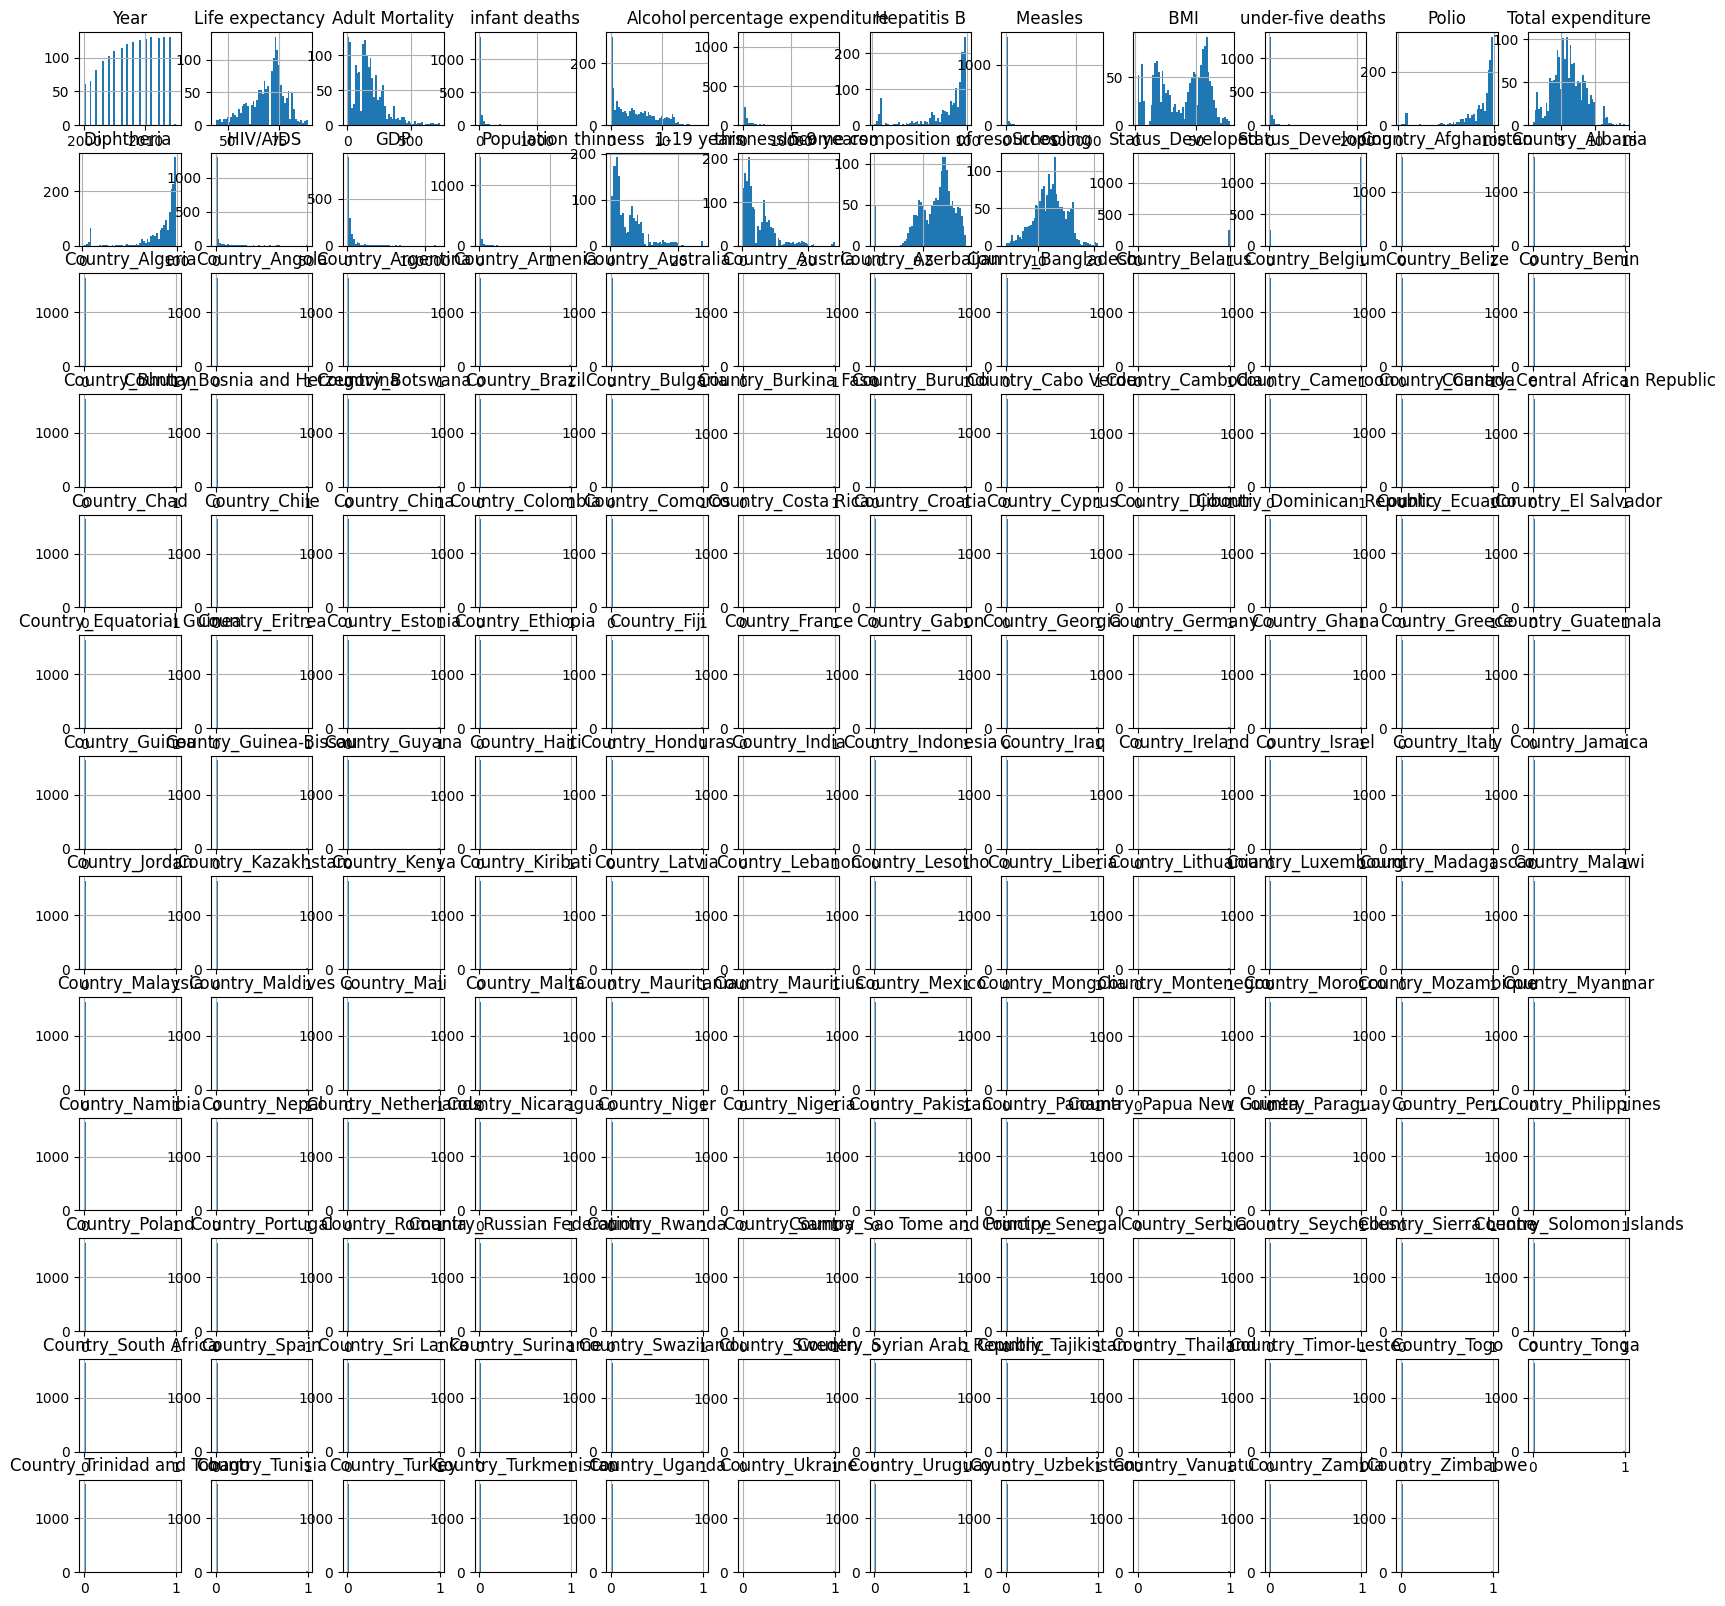

In [ ]:
df_final.hist(bins=10, figsize=(50,50))
plt.show()

In [9]:
corr_matrix = df_final.corr()
corr_matrix["Life expectancy "].sort_values(ascending=False)


Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
 BMI                               0.542042
Status_Developed                   0.442798
                                     ...   
Status_Developing                 -0.442798
 thinness 5-9 years               -0.457508
 thinness  1-19 years             -0.457838
 HIV/AIDS                         -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy , Length: 155, dtype: float64

In [ ]:
#Calculate the correlation matrix
corr_matrix = df_final.corr()

# Select the 10 most correlated variables with ‘Life expectancy’
selected_features = corr_matrix["Life expectancy "].abs().sort_values(ascending=False).index[1:20]

# Defines the predictor variables and the target variable
X = df_final[selected_features]
y = df_final["Life expectancy "]

# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, precision_score, recall_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluate the model
r2_test = r2_score(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f"R²_test: {r2_test}")
print(f"RMSE_test: {rmse_test}")
# R²_test = 0.805 → The model explains 80.5% of the variability in the test set.
# RMSE_test = 3.72 → The average error in the predictions is 3.72 units in Life expectancy.


R²_test: 0.8056461812992144
RMSE_test: 3.7153049770555477


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f"R²_train: {r2_train}")
print(f"RMSE_train: {rmse_train}")
# R²_train = 0.833 → The model explains 83.3% of the variability in training
# RMSE_train = 3.63 → Similar to RMSE_test, indicating good balance between train and test (no extreme overfitting)

R²_train: 0.832988573855185
RMSE_train: 3.627687516799703


In [ ]:
# Obtain absolute coefficients
coeficientes = np.abs(model.coef_)

# Create a DataFrame with variable names
coef_df = pd.DataFrame({"Variable": X.columns, "Coeficiente": coeficientes})

# Order and select the 10 most significant
top_10 = coef_df.sort_values(by="Coeficiente", ascending=False).head(10)

print(top_10)


                           Variable  Coeficiente
0                         Schooling     2.882954
3                          HIV/AIDS     2.842244
2                   Adult Mortality     2.116143
1   Income composition of resources     1.707680
10           percentage expenditure     0.840205
11                          Alcohol     0.757907
4                              BMI      0.580372
12                      Diphtheria      0.456627
5              thinness  1-19 years     0.388935
18                   Country_Malawi     0.312280


In [ ]:
# Schooling: An additional year of schooling could be associated with a considerable change (2.88 units) in life expectancy.
#HIV/AIDS: An increase in this variable (percentage of population affected, for example) could be associated with a change of up to 2.84 years in life expectancy.
#Adult Mortality: Each increase in this rate is associated with a change of 2.12 years in life expectancy.
#Income Composition of Resources: The higher the income index, the better the living conditions and the longer the life expectancy.
#Percentage Expenditure: Countries that invest more in public health tend to have better health care systems and thus longer life expectancy.
#An increase in this expenditure is associated with a change of approximately 0.84 years in life expectancy.
#Alcohol: The higher the alcohol consumption, the lower the life expectancy. 